In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:/Users/mchet/OneDrive/Рабочий стол/Робота/бот/Alorbot/data/datasets/ABIO/1m.csv')
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(data['close'].values.reshape(-1, 1))

data_length = len(X)
y = np.random.choice([0, 1], data_length)
timesteps = 60

In [3]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [4]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y_categorical[:train_size], y_categorical[train_size:]


In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [6]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(timesteps, 1)))
model.add(LSTM(units=50))
model.add(Dense(2, activation='softmax'))

c:\Users\mchet\OneDrive\Рабочий стол\Робота\бот\Alorbot\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.4991 - loss: 0.6933 - val_accuracy: 0.5004 - val_loss: 0.6933
Epoch 2/20
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5013 - loss: 0.6932 - val_accuracy: 0.4996 - val_loss: 0.6932
Epoch 3/20
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.4996 - val_loss: 0.6931
Epoch 4/20
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5023 - loss: 0.6931 - val_accuracy: 0.5004 - val_loss: 0.6932
Epoch 5/20
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4980 - loss: 0.6932 - val_accuracy: 0.5004 - val_loss: 0.6932
Epoch 6/20
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5072 - loss: 0.6931 - val_accuracy: 0.5004 - val_loss: 0.6931
Epoch 7/20
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5034 - loss: 0.6932 - val_accuracy: 0.4996 - val_loss: 0.6932
Epoch 8/20
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4989 - loss: 0.6932 - 

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

560/560 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.4942 - loss: 0.6933
Accuracy: 49.92%


In [9]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)
true_classes = np.argmax(y_test, axis=1)

560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 892us/step


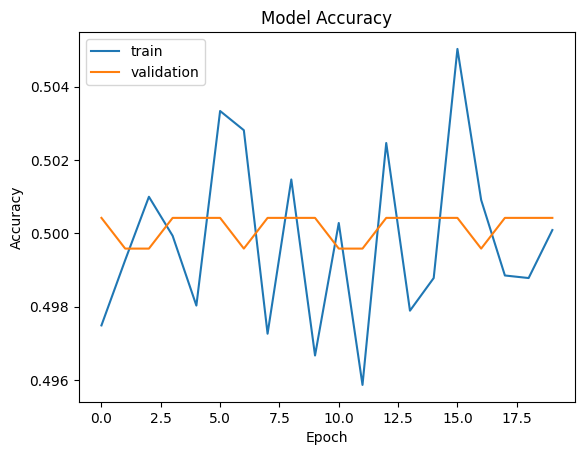

In [10]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()